In [94]:
import numpy as np
import pandas as pd
from matplotlib import collections  as mc
import pylab as pl
import matplotlib.pyplot as plt

from scipy.stats.t import ppf 

ModuleNotFoundError: No module named 'scipy.stats.t'

In [86]:
def acf(y, max_lags, barlett_ci = False, ci = 0.95):
    if type(y) == list:
        y = pd.DataFrame(y)
    elif y == pd.core.frame.DataFrame:
        pass
    else: 
        print("Type {} not supported.".format(type(y)))
    mean = y.mean()[0]
    var = y.var()[0]
    _acf = []
    T = len(y)
    for p in range(max_lags+1):
        tmp = pd.concat([y, y.shift(p)], axis = 1).dropna()
        tmp = tmp-mean
        mult = tmp.iloc[:, 0] * tmp.iloc[:, 1]
        mult = mult.sum()/(var * (T-1))
        _acf.append(mult)
    if barlett_ci:
        up_ci, lw_ci = barlett(T, _acf)
    coords = []
    for x1, x2 in zip(range(max_lags+1), _acf):
        coords.append([(x1, 0), (x1, x2)])
    lc = mc.LineCollection(coords, linewidths=1, color = "black")
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    #ax.margins(0.1)
    ax.axhline(y=0, xmin=0.0, xmax=1, color = "black", linewidth = 1)
    ax.plot(lw_ci, linestyle = "--", color = "blue", linewidth = 1)
    ax.plot(up_ci, linestyle = "--", color = "blue", linewidth = 1)
        
    return _acf

In [87]:
a = list(range(100))

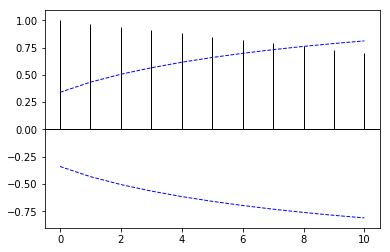

In [88]:
b = acf(a, 10, True)

In [6]:

c = list(range(len(b)))

In [85]:
def barlett(n, p):
    up_ci = []
    lw_ci = []
    
    for k in range(len(p)):
        sd = np.sqrt((1 + sum([2*p_k**2 for p_k in p[:k+1]]))/n)
        up_ci.extend([1.96 * sd])
        lw_ci.extend([-1.96 * sd])
    return up_ci, lw_ci
        
        
n = len(a)
up_ci = []
lw_ci = []
mean = np.mean(b)
for k in range(100):
    sd  =  np.sqrt((1 + sum([2*p**2 for p in b[:k+1]]))/n)
    up_ci.extend([mean + 1.96 * sd])
    lw_ci.extend([mean -1.96 * sd])

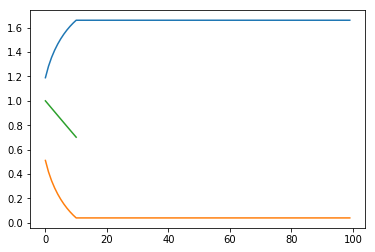

In [89]:
plt.plot(up_ci)
plt.plot(lw_ci)
plt.plot(b)

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

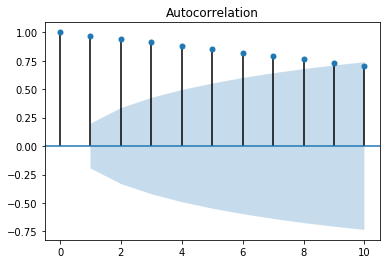

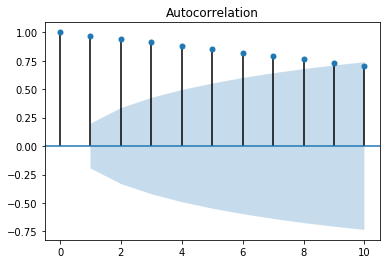

In [84]:
plot_acf(a, lags = 10)

In [27]:
np.mean(b)

0.004950495049504951